<a href="https://colab.research.google.com/github/utkarsh0702/Projects/blob/master/Milestone_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
plt.rcParams['figure.figsize']=(10,8)

In [208]:
df= pd.read_excel('Dataset.xlsx')
df

,Hospital,Name,Date of Testing,Age,Gender,Pre-natal Complications,Delivery Type (Normal/ Forceps /C-section),Pre-mature Birth,Delayed Birth Cry,Low/High Birth weight,Neo-natal Jaundice,Low APGAR Score,Congenital organo/body part deffect,Breast feeding Complications,Primary immunizations Done,Low immunity,Seizures,Physical Trauma,Any severe Infection,Cerebral Palsy,Genetic/Chromosomal Issue,Neck Holding (Months),Independent Sitting (months,Independent Walk started (Months),Speech -One word (Months),Speech Sentence (Months),Toilet control (Months),Academic Performance(Good/Average/Poor),Peer group Interaction(Good/ Average/ Poor),Behavioural Issues / Unusual Behaviour,NOWalk/ with support,Unclear / No Speech/ Stammering
0,ACDC,Dhairya,2011-12-22,11 yrs,M,No,Forceps,No,Yes,No,Yes,Yes,yes,No,yes,No,No,No,No,No,No,4,8,13,12,26,28,Average,Good,yes,No,No
1,ACDC,Imad,2011-12-26,6 yrs,M,No,C-section,No,No,No,No,No,NO,No,Yes,Yes,No,NO,No,No,No,6,10,20,24,42,50,Poor,Poor,No,No,NO
2,ACDC,Kalyan,2011-12-12,9 yrs,M,No,Normal,No,No,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,3,7,12,11,24,30,Average,Poor,No,NO,NO
3,ACDC,Krishna,2011-12-06,7 yrs,M,No,C-section,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,3,7,14,12,42,46,Poor,Poor,Yes,No,No
4,ACDC,Manikya,2011-12-26,2 yrs/ 5 yrs,M,yes,C-section,No,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,4,9,24,18,46,42,Poor,Poor,Yes,No,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ACDC,Manikant,2012-06-19,7 yrs,M,yes,Normal,No,No,No,No,No,NO,No,yes,Yes,No,No,Yes,No,Yes,5,9,24,24,60,66,poor,Average,Yes,No,Yes
96,ACDC,Mani,2012-06-20,5 yrs,M,yes,C-section,No,Yes,No,No,No,NO,No,yes,Yes,No,No,Yes,No,No,3,6,12,18,36,30,good,Average,yes,No,No
97,ACDC,Msri Manju V.,2012-08-16,7 yrs,M,No,C-section,No,No,No,No,No,NO,No,Yes,No,Yes,NO,No,No,No,3,6,12,12,36,30,Good,Average,Yes,No,No
98,ACDC,Manya,2012-12-14,6 yrs,F,yes,C-section,No,No,No,No,No,NO,No,Yes,Yes,Yes,NO,No,no,No,4,7,18,11,36,32,Average,Good,Yes,Yes,NO


# Data Preprocessing

In [209]:
df= df.apply(lambda x: x.astype(str).str.lower())
df

,Hospital,Name,Date of Testing,Age,Gender,Pre-natal Complications,Delivery Type (Normal/ Forceps /C-section),Pre-mature Birth,Delayed Birth Cry,Low/High Birth weight,Neo-natal Jaundice,Low APGAR Score,Congenital organo/body part deffect,Breast feeding Complications,Primary immunizations Done,Low immunity,Seizures,Physical Trauma,Any severe Infection,Cerebral Palsy,Genetic/Chromosomal Issue,Neck Holding (Months),Independent Sitting (months,Independent Walk started (Months),Speech -One word (Months),Speech Sentence (Months),Toilet control (Months),Academic Performance(Good/Average/Poor),Peer group Interaction(Good/ Average/ Poor),Behavioural Issues / Unusual Behaviour,NOWalk/ with support,Unclear / No Speech/ Stammering
0,acdc,dhairya,2011-12-22,11 yrs,m,no,forceps,no,yes,no,yes,yes,yes,no,yes,no,no,no,no,no,no,4,8,13,12,26,28,average,good,yes,no,no
1,acdc,imad,2011-12-26,6 yrs,m,no,c-section,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,6,10,20,24,42,50,poor,poor,no,no,no
2,acdc,kalyan,2011-12-12,9 yrs,m,no,normal,no,no,yes,no,no,no,no,yes,yes,no,no,no,no,no,3,7,12,11,24,30,average,poor,no,no,no
3,acdc,krishna,2011-12-06,7 yrs,m,no,c-section,no,no,no,no,no,no,no,yes,yes,no,no,no,no,no,3,7,14,12,42,46,poor,poor,yes,no,no
4,acdc,manikya,2011-12-26,2 yrs/ 5 yrs,m,yes,c-section,no,no,no,no,no,no,no,yes,no,no,no,yes,yes,no,4,9,24,18,46,42,poor,poor,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,acdc,manikant,2012-06-19,7 yrs,m,yes,normal,no,no,no,no,no,no,no,yes,yes,no,no,yes,no,yes,5,9,24,24,60,66,poor,average,yes,no,yes
96,acdc,mani,2012-06-20,5 yrs,m,yes,c-section,no,yes,no,no,no,no,no,yes,yes,no,no,yes,no,no,3,6,12,18,36,30,good,average,yes,no,no
97,acdc,msri manju v.,2012-08-16,7 yrs,m,no,c-section,no,no,no,no,no,no,no,yes,no,yes,no,no,no,no,3,6,12,12,36,30,good,average,yes,no,no
98,acdc,manya,2012-12-14,6 yrs,f,yes,c-section,no,no,no,no,no,no,no,yes,yes,yes,no,no,no,no,4,7,18,11,36,32,average,good,yes,yes,no


In [210]:
#Converting yes and no to 2 and 1
df[df == 'yes'] = 2
df[df == 'no'] = 1
# Good, average and poor to 3,2,1
df[df == 'good'] = 3
df[df == 'average'] = 2
df[df == 'poor'] = 1
#converting forceps, normal, c-section
df[df == 'forceps'] = 3
df[df == 'normal'] = 2
df[df == 'c-section'] = 1
df

,Hospital,Name,Date of Testing,Age,Gender,Pre-natal Complications,Delivery Type (Normal/ Forceps /C-section),Pre-mature Birth,Delayed Birth Cry,Low/High Birth weight,Neo-natal Jaundice,Low APGAR Score,Congenital organo/body part deffect,Breast feeding Complications,Primary immunizations Done,Low immunity,Seizures,Physical Trauma,Any severe Infection,Cerebral Palsy,Genetic/Chromosomal Issue,Neck Holding (Months),Independent Sitting (months,Independent Walk started (Months),Speech -One word (Months),Speech Sentence (Months),Toilet control (Months),Academic Performance(Good/Average/Poor),Peer group Interaction(Good/ Average/ Poor),Behavioural Issues / Unusual Behaviour,NOWalk/ with support,Unclear / No Speech/ Stammering
0,acdc,dhairya,2011-12-22,11 yrs,m,1,3,1,2,1,2,2,2,1,2,1,1,1,1,1,1,4,8,13,12,26,28,2,3,2,1,1
1,acdc,imad,2011-12-26,6 yrs,m,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,6,10,20,24,42,50,1,1,1,1,1
2,acdc,kalyan,2011-12-12,9 yrs,m,1,2,1,1,2,1,1,1,1,2,2,1,1,1,1,1,3,7,12,11,24,30,2,1,1,1,1
3,acdc,krishna,2011-12-06,7 yrs,m,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,3,7,14,12,42,46,1,1,2,1,1
4,acdc,manikya,2011-12-26,2 yrs/ 5 yrs,m,2,1,1,1,1,1,1,1,1,2,1,1,1,2,2,1,4,9,24,18,46,42,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,acdc,manikant,2012-06-19,7 yrs,m,2,2,1,1,1,1,1,1,1,2,2,1,1,2,1,2,5,9,24,24,60,66,1,2,2,1,2
96,acdc,mani,2012-06-20,5 yrs,m,2,1,1,2,1,1,1,1,1,2,2,1,1,2,1,1,3,6,12,18,36,30,3,2,2,1,1
97,acdc,msri manju v.,2012-08-16,7 yrs,m,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,3,6,12,12,36,30,3,2,2,1,1
98,acdc,manya,2012-12-14,6 yrs,f,2,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,4,7,18,11,36,32,2,3,2,2,1


In [211]:
df.tail(10)

,Hospital,Name,Date of Testing,Age,Gender,Pre-natal Complications,Delivery Type (Normal/ Forceps /C-section),Pre-mature Birth,Delayed Birth Cry,Low/High Birth weight,Neo-natal Jaundice,Low APGAR Score,Congenital organo/body part deffect,Breast feeding Complications,Primary immunizations Done,Low immunity,Seizures,Physical Trauma,Any severe Infection,Cerebral Palsy,Genetic/Chromosomal Issue,Neck Holding (Months),Independent Sitting (months,Independent Walk started (Months),Speech -One word (Months),Speech Sentence (Months),Toilet control (Months),Academic Performance(Good/Average/Poor),Peer group Interaction(Good/ Average/ Poor),Behavioural Issues / Unusual Behaviour,NOWalk/ with support,Unclear / No Speech/ Stammering
90,acdc,lakshmi,2012-05-24,5 yrs,f,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,3,7,14,11,36,36,2,3,2,1,2
91,acdc,likit,2012-11-03,8 yrs,m,1,1,1,1,1,1,1,1,1,2,2,1,1,2,1,1,4,7,12,11,30,28,2,3,1,1,1
92,acdc,mahk,2012-12-31,11 yrs,f,1,1,1,1,1,1,1,1,1,2,1,2,1,2,1,1,3,7,12,18,60,30,1,2,2,1,2
93,acdc,mahesh,2012-08-01,14 yrs,m,1,2,1,2,2,1,1,1,1,1,2,2,1,1,1,1,9,12,24,12,42,36,1,1,1,1,1
94,acdc,mahezabeen,2012-11-29,3 yrs/5 yrs,f,2,2,1,2,1,1,2,1,2,1,2,2,1,2,2,1,48,62,0,36,0,68,1,1,1,2,2
95,acdc,manikant,2012-06-19,7 yrs,m,2,2,1,1,1,1,1,1,1,2,2,1,1,2,1,2,5,9,24,24,60,66,1,2,2,1,2
96,acdc,mani,2012-06-20,5 yrs,m,2,1,1,2,1,1,1,1,1,2,2,1,1,2,1,1,3,6,12,18,36,30,3,2,2,1,1
97,acdc,msri manju v.,2012-08-16,7 yrs,m,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,3,6,12,12,36,30,3,2,2,1,1
98,acdc,manya,2012-12-14,6 yrs,f,2,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,4,7,18,11,36,32,2,3,2,2,1
99,acdc,amir,2012-03-31,7 yrs,m,2,1,1,1,1,1,1,1,1,2,2,2,1,2,1,1,4,8,14,12,36,30,2,3,2,1,1


In [212]:
x_data= df.iloc[:,5:21]
# x_data.drop(['Seizures', 'Physical Trauma', 'Any severe Infection'], axis=1, inplace=True)
x_data.drop

<bound method DataFrame.drop of    Pre-natal Complications  ... Genetic/Chromosomal Issue
0                        1  ...                         1
1                        1  ...                         1
2                        1  ...                         1
3                        1  ...                         1
4                        2  ...                         1
..                     ...  ...                       ...
95                       2  ...                         2
96                       2  ...                         1
97                       1  ...                         1
98                       2  ...                         1
99                       2  ...                         1

[100 rows x 16 columns]>

In [213]:
x_data_mod= x_data.to_numpy()
print(x_data_mod.shape)
x_data_mod

(100, 16)


array([[1, 3, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 2, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [2, 1, 1, ..., 1, 1, 1],
       [2, 1, 1, ..., 2, 1, 1]], dtype=object)

**Taking y label only the first column**

In [214]:
y_data=df.iloc[:,21].to_numpy()
y_data= y_data.reshape(100,1)
y_data.shape

(100, 1)

In [215]:
from sklearn.model_selection import train_test_split

In [216]:
x_train, x_test, y_train, y_test= train_test_split(x_data_mod, y_data, test_size=0.05)
x_train= tf.convert_to_tensor(x_train, tf.float16)
y_train= tf.convert_to_tensor(y_train, tf.float16)
x_test= tf.convert_to_tensor(x_test, tf.float16)
y_test= tf.convert_to_tensor(y_test, tf.float16)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(95, 16)
(5, 16)
(95, 1)
(5, 1)


In [217]:
# making weights initialization predictable
np.random.seed(0)

# First Milestone

**Learning Rate Scheduling**


In [218]:
keras.backend.clear_session()
model1= keras.models.Sequential([
                                keras.layers.Dense(16, activation='relu', input_shape=(1,16)),
                                keras.layers.Dense(4, activation='relu'),
                                keras.layers.Dense(1)
])
# Learning Rate Schedular
lr_schedular= tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-8*10**(x/20))

#model compile
adam=keras.optimizers.Adam(lr=1e-8)
model1.compile(optimizer= adam, loss='mse')
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 16)             272       
_________________________________________________________________
dense_1 (Dense)              (None, 1, 4)              68        
_________________________________________________________________
dense_2 (Dense)              (None, 1, 1)              5         
Total params: 345
Trainable params: 345
Non-trainable params: 0
_________________________________________________________________


In [219]:
history= model1.fit(x_train, y_train, epochs=200,callbacks= [lr_schedular])

Epoch 1/200
3/3 [==============================] - 0s 2ms/step - loss: 88.4573 - lr: 1.0000e-08
Epoch 2/200
3/3 [==============================] - 0s 2ms/step - loss: 88.4573 - lr: 1.1220e-08
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 88.4573 - lr: 1.2589e-08
Epoch 4/200
3/3 [==============================] - 0s 2ms/step - loss: 88.4573 - lr: 1.4125e-08
Epoch 5/200
3/3 [==============================] - 0s 2ms/step - loss: 88.4572 - lr: 1.5849e-08
Epoch 6/200
3/3 [==============================] - 0s 2ms/step - loss: 88.4572 - lr: 1.7783e-08
Epoch 7/200
3/3 [==============================] - 0s 2ms/step - loss: 88.4572 - lr: 1.9953e-08
Epoch 8/200
3/3 [==============================] - 0s 1ms/step - loss: 88.4572 - lr: 2.2387e-08
Epoch 9/200
3/3 [==============================] - 0s 1ms/step - loss: 88.4571 - lr: 2.5119e-08
Epoch 10/200
3/3 [==============================] - 0s 2ms/step - loss: 88.4571 - lr: 2.8184e-08
Epoch 11/200
3/3 [=====================

In [220]:
loss= min(history.history['loss'])
losses= history.history['loss']
index=losses.index(loss)
lrs= history.history['lr']
count=0
for i in lrs:
  if count==index:
    lr=i
    break
  count+=1
print(lr)
print(loss)

0.25118864
24.417844772338867


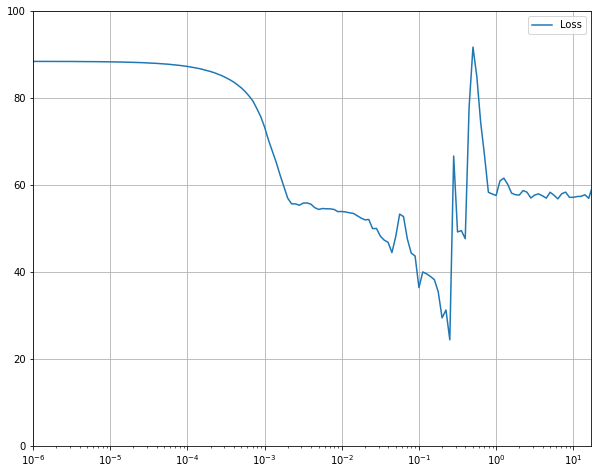

In [221]:
lrs= 1e-8*(10**(np.arange(200)/20))
plt.semilogx(lrs, history.history["loss"], label='Loss')
plt.axis([1e-6, 1.7e1, 0, 100])
plt.legend(loc='best')
plt.grid(True)

**Training the model**

In [222]:
keras.backend.clear_session()
model1= keras.models.Sequential([
                                keras.layers.Dense(16, activation='relu', input_shape=(1,16)),
                                keras.layers.Dense(4, activation='relu'),
                                keras.layers.Dense(1)
])

#model compile
adam=keras.optimizers.Adam(lr=lr)
model1.compile(optimizer= adam, loss='mse')

#model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 16)             272       
_________________________________________________________________
dense_1 (Dense)              (None, 1, 4)              68        
_________________________________________________________________
dense_2 (Dense)              (None, 1, 1)              5         
Total params: 345
Trainable params: 345
Non-trainable params: 0
_________________________________________________________________


In [223]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model1.hdf5", monitor='loss', verbose=1,
                                                save_best_only=True, mode='auto', period=1)

In [224]:
history= model1.fit(x_train, y_train, epochs= 10, callbacks=[checkpoint])

Epoch 1/10
1/3 [=========>....................] - ETA: 0s - loss: 172.3543
Epoch 00001: loss improved from inf to 81.67780, saving model to best_model1.hdf5
3/3 [==============================] - 0s 7ms/step - loss: 81.6778
Epoch 2/10
1/3 [=========>....................] - ETA: 0s - loss: 102.6050
Epoch 00002: loss improved from 81.67780 to 74.49899, saving model to best_model1.hdf5
3/3 [==============================] - 0s 6ms/step - loss: 74.4990
Epoch 3/10
1/3 [=========>....................] - ETA: 0s - loss: 23.5062
Epoch 00003: loss did not improve from 74.49899
3/3 [==============================] - 0s 2ms/step - loss: 78.3496
Epoch 4/10
1/3 [=========>....................] - ETA: 0s - loss: 22.0582
Epoch 00004: loss improved from 74.49899 to 61.17556, saving model to best_model1.hdf5
3/3 [==============================] - 0s 7ms/step - loss: 61.1756
Epoch 5/10
1/3 [=========>....................] - ETA: 0s - loss: 135.2398
Epoch 00005: loss did not improve from 61.17556
3/3 [==

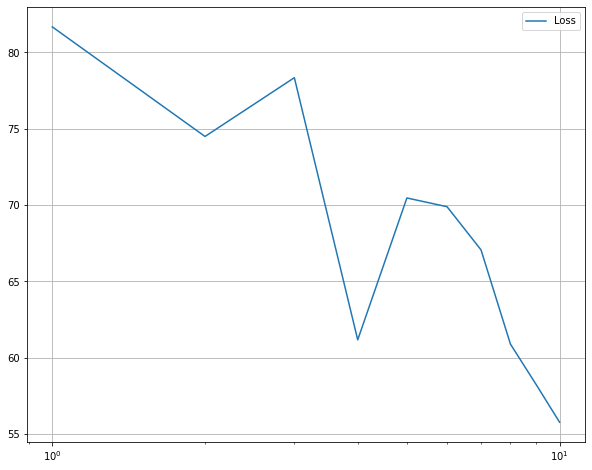

In [225]:
epochs= range(1,11)
plt.semilogx(epochs, history.history["loss"], label='Loss')
plt.legend(loc='best')
plt.grid(True)

In [226]:
model1= tf.keras.models.load_model('best_model1.hdf5')

In [227]:
model1.evaluate(x_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.8612


0.8612211346626282

In [228]:
pred= model1.predict(x_test)
pred

array([[4.120872],
       [4.527892],
       [4.128813],
       [4.015539],
       [4.223365]], dtype=float32)

In [229]:
y_test

<tf.Tensor: shape=(5, 1), dtype=float16, numpy=
array([[3.],
       [4.],
       [3.],
       [4.],
       [3.]], dtype=float16)>

# Second Milestone

In [230]:
#input
x_data_modulus= tf.convert_to_tensor(x_data_mod, tf.float16)
pred= model1.predict(x_data_modulus)
x_data_mod = np.column_stack((x_data_mod, pred))
x_data_mod.shape

(100, 17)

In [231]:
#output
y_data=df.iloc[:,22].to_numpy()
y_data= y_data.reshape(100,1)
y_data.shape

(100, 1)

In [232]:
x_train, x_test, y_train, y_test= train_test_split(x_data_mod, y_data, test_size=0.05)
x_train= tf.convert_to_tensor(x_train, tf.float16)
y_train= tf.convert_to_tensor(y_train, tf.float16)
x_test= tf.convert_to_tensor(x_test, tf.float16)
y_test= tf.convert_to_tensor(y_test, tf.float16)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(95, 17)
(5, 17)
(95, 1)
(5, 1)


In [233]:
keras.backend.clear_session()
model2= keras.models.Sequential([
                                keras.layers.Dense(17, activation='relu', input_shape=(1,17)),
                                keras.layers.Dense(5, activation='relu'),
                                keras.layers.Dense(1)
])
# Learning Rate Schedular
lr_schedular= tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-8*10**(x/20))

#model compile
adam=keras.optimizers.Adam(lr=1e-8)
model2.compile(optimizer= adam, loss='mse')
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 17)             306       
_________________________________________________________________
dense_1 (Dense)              (None, 1, 5)              90        
_________________________________________________________________
dense_2 (Dense)              (None, 1, 1)              6         
Total params: 402
Trainable params: 402
Non-trainable params: 0
_________________________________________________________________


In [234]:
history= model2.fit(x_train, y_train, epochs=200,callbacks= [lr_schedular])

Epoch 1/200
3/3 [==============================] - 0s 2ms/step - loss: 177.1149 - lr: 1.0000e-08
Epoch 2/200
3/3 [==============================] - 0s 2ms/step - loss: 177.1148 - lr: 1.1220e-08
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 177.1148 - lr: 1.2589e-08
Epoch 4/200
3/3 [==============================] - 0s 2ms/step - loss: 177.1148 - lr: 1.4125e-08
Epoch 5/200
3/3 [==============================] - 0s 2ms/step - loss: 177.1148 - lr: 1.5849e-08
Epoch 6/200
3/3 [==============================] - 0s 2ms/step - loss: 177.1147 - lr: 1.7783e-08
Epoch 7/200
3/3 [==============================] - 0s 2ms/step - loss: 177.1146 - lr: 1.9953e-08
Epoch 8/200
3/3 [==============================] - 0s 2ms/step - loss: 177.1146 - lr: 2.2387e-08
Epoch 9/200
3/3 [==============================] - 0s 2ms/step - loss: 177.1145 - lr: 2.5119e-08
Epoch 10/200
3/3 [==============================] - 0s 2ms/step - loss: 177.1145 - lr: 2.8184e-08
Epoch 11/200
3/3 [===========

In [235]:
loss= min(history.history['loss'])
losses= history.history['loss']
index=losses.index(loss)
lrs= history.history['lr']
count=0
for i in lrs:
  if count==index:
    lr=i
    break
  count+=1
print(lr)
print(loss)

0.2818383
48.41835021972656


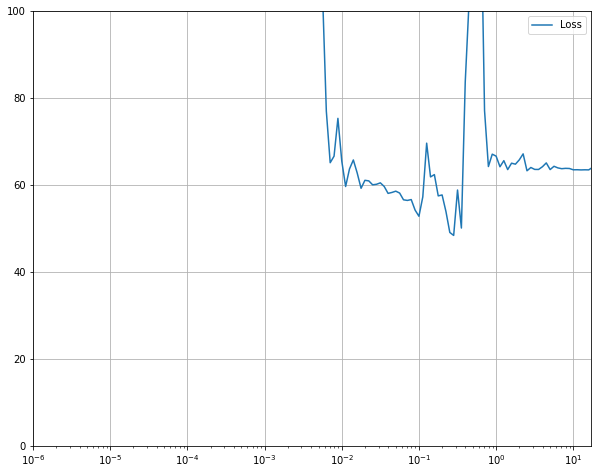

In [236]:
lrs= 1e-8*(10**(np.arange(200)/20))
plt.semilogx(lrs, history.history["loss"], label='Loss')
plt.axis([1e-6, 1.7e1, 0, 100])
plt.legend(loc='best')
plt.grid(True)

In [237]:
keras.backend.clear_session()
model2= keras.models.Sequential([
                                keras.layers.Dense(17, activation='relu', input_shape=(1,17)),
                                keras.layers.Dense(5, activation='relu'),
                                keras.layers.Dense(1)
])

#model compile
adam=keras.optimizers.Adam(lr=lr)
model2.compile(optimizer= adam, loss='mse')
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 17)             306       
_________________________________________________________________
dense_1 (Dense)              (None, 1, 5)              90        
_________________________________________________________________
dense_2 (Dense)              (None, 1, 1)              6         
Total params: 402
Trainable params: 402
Non-trainable params: 0
_________________________________________________________________


In [238]:
history= model2.fit(x_train, y_train, epochs= 10)

Epoch 1/10
3/3 [==============================] - 0s 2ms/step - loss: 199.8375
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 153.6540
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 139.4858
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: 125.6529
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: 114.1833
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: 103.4175
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: 94.7458
Epoch 8/10
3/3 [==============================] - 0s 2ms/step - loss: 87.4011
Epoch 9/10
3/3 [==============================] - 0s 2ms/step - loss: 81.4211
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 76.2622


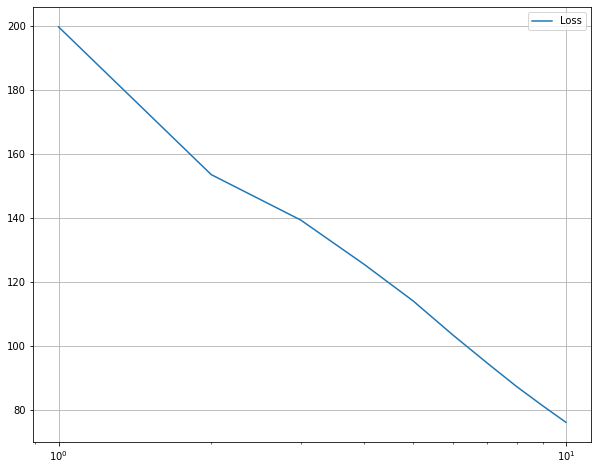

In [239]:
epochs= range(1,11)
plt.semilogx(epochs, history.history["loss"], label='Loss')
plt.legend(loc='best')
plt.grid(True)

In [240]:
model2.evaluate(x_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 5.6385


5.638489723205566

In [241]:
pred= model2.predict(x_test)
pred

array([[7.42942],
       [7.42942],
       [7.42942],
       [7.42942],
       [7.42942]], dtype=float32)

In [242]:
y_test

<tf.Tensor: shape=(5, 1), dtype=float16, numpy=
array([[10.],
       [ 7.],
       [ 7.],
       [12.],
       [ 8.]], dtype=float16)>

# Milestone 3